In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, losses
from keras.datasets import fashion_mnist
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

y_train would be same as x_train because we want to reconstruct the original image

In [14]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train, x_test = x_train.astype('float32')/255., x_test.astype('float32')/255. #normalizing the images


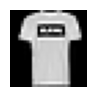

In [15]:
plt.figure(figsize=(1,1)) #sample image
plt.imshow(x_train[1])
plt.gray()
plt.axis('off')
plt.show()

This autoencoder is made up of Dense layers

In [16]:
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
            layers.Reshape(shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [18]:
shape = x_train[0].shape
latent_dim = 64
print(shape)
autoencoder = Autoencoder(latent_dim, shape)

(28, 28)


In [20]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0242 - val_loss: 0.0134
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0117 - val_loss: 0.0109
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - 

In [22]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

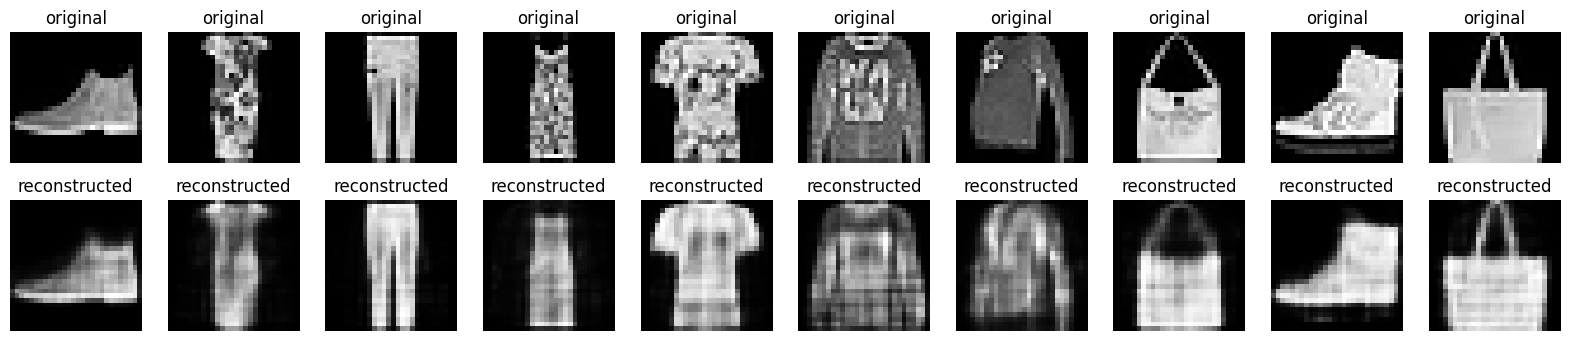

In [24]:
plt.figure(figsize=(20,4))
for i in range(10):
    ax = plt.subplot(2,10,i+1)
    plt.imshow(x_test[100*i])
    plt.title('original')
    plt.gray()
    plt.axis('off')

    ax = plt.subplot(2,10,10+i+1)
    plt.imshow(decoded_imgs[100*i])
    plt.title('reconstructed')
    plt.gray()
    plt.axis('off')
plt.show()